# Find out daily progress from a public platform

# Day 1

In [11]:
#import Data from website

In [85]:
import pandas as pd
import datetime
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver=webdriver.Chrome(r"C:\Users\lenovo\Downloads\Chrome gecko folder\chromedriver.exe")
driver.get("http://omms.nic.in/")

In [86]:
dfs = pd.read_html(driver.page_source)

In [87]:
#today's data
today_data=dfs[0]
today_data.tail()

,State,Target Length,Completed Length,Target Habitations,Connected Habitations
27,Uttarakhand,5425.0,1810.239,300,83
28,West Bengal,3000.0,1404.983,95,32
29,Telangana,800.0,127.274,29,18
30,Ladakh (UT),413.0,85.230,0,0
31,Total,66784.0,18616.452,5108,1341


### Save today's data as csv

In [88]:
today=pd.to_datetime("today")
today_date=today.strftime("%A %d %B %Y")
today_data.to_csv(today_date+".csv")
today_date

'Tuesday 26 January 2021'

### Create Previous day Date 

In [89]:
previous_day=today-datetime.timedelta(days=1)
previous_date=previous_day.strftime("%A %d %B %Y")
previous_date

'Monday 25 January 2021'

# Day 2

### Open file the next day

#### Find out Balance Length and daily requirements till March 2020

In [90]:
progress=pd.read_csv(previous_date+".csv")
progress["Today"]=pd.to_datetime("today")
progress["yesterday"]=progress["Today"]-datetime.timedelta(days=1)
progress["March"]=pd.to_datetime("2021-3-31")
progress["Balance Length"]=progress["Target Length"]-progress["Completed Length"]
progress["days"]=progress["March"]-progress["yesterday"]
progress["Days"]=progress["days"].dt.days
progress["Daily Requirements"]=progress["Balance Length"]/progress["Days"]
progress.tail()


,Unnamed: 0,State,Target Length,Completed Length,Target Habitations,Connected Habitations,Today,yesterday,March,Balance Length,days,Days,Daily Requirements
27,27,Uttarakhand,5425.0,1808.139,300,83,2021-01-26 23:50:46.203807,2021-01-25 23:50:46.203807,2021-03-31,3616.861,64 days 00:09:13.796193,64,56.513453
28,28,West Bengal,3000.0,1404.983,95,32,2021-01-26 23:50:46.203807,2021-01-25 23:50:46.203807,2021-03-31,1595.017,64 days 00:09:13.796193,64,24.922141
29,29,Telangana,800.0,126.274,29,18,2021-01-26 23:50:46.203807,2021-01-25 23:50:46.203807,2021-03-31,673.726,64 days 00:09:13.796193,64,10.526969
30,30,Ladakh (UT),413.0,85.230,0,0,2021-01-26 23:50:46.203807,2021-01-25 23:50:46.203807,2021-03-31,327.770,64 days 00:09:13.796193,64,5.121406
31,31,Total,66784.0,18573.029,5108,1340,2021-01-26 23:50:46.203807,2021-01-25 23:50:46.203807,2021-03-31,48210.971,64 days 00:09:13.796193,64,753.296422


### Find out today's achievement by merging both day's data

In [91]:
todayachieve=pd.merge(today_data,progress,on="State")
todayachieve

today1=str(today.date())
todayachieve["Achievement as on {}".format(today1)]=todayachieve["Completed Length_x"]-todayachieve["Completed Length_y"]
ta1=(todayachieve[["State","Achievement as on {}".format(today1),"Daily Requirements","Target Length_x","Completed Length_x"]])

#Round off figures upto 2 decimals
ta1["Achievement as on {}".format(today1)]=ta1["Achievement as on {}".format(today1)].round(2)
ta1["Daily Requirements"]=ta1["Daily Requirements"].round(2)


ta1.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,State,Achievement as on 2021-01-26,Daily Requirements,Target Length_x,Completed Length_x
0,Andaman And Nicobar Islands (UT),-0.00,0.93,85.0,25.569
1,Andhra Pradesh,0.00,22.94,1797.0,328.916
2,Arunachal Pradesh,19.27,63.54,4850.0,802.410
3,Assam,2.49,15.83,2130.0,1119.621
4,Bihar,0.00,48.29,4490.0,1399.453


### Renaming column names as required 

In [92]:
ta2=ta1.rename(columns={"Completed Length_x":"Completed Length","Target Length_x":"Target Length"})
ta2.to_csv("Daily Achievement {0}.csv".format(today1))
ta2.head()

,State,Achievement as on 2021-01-26,Daily Requirements,Target Length,Completed Length
0,Andaman And Nicobar Islands (UT),-0.00,0.93,85.0,25.569
1,Andhra Pradesh,0.00,22.94,1797.0,328.916
2,Arunachal Pradesh,19.27,63.54,4850.0,802.410
3,Assam,2.49,15.83,2130.0,1119.621
4,Bihar,0.00,48.29,4490.0,1399.453


# Objective achieved !!!!

### Next objective - Data visualization through geopandas 

### Import Shapefile

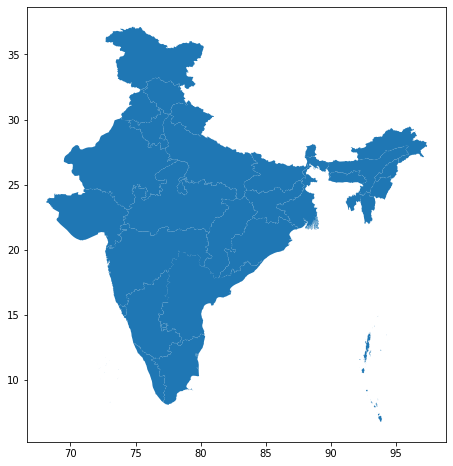

,ST_NAME,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12..."
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431..."
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624..."
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952..."
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646..."


In [93]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

india=gpd.read_file(r"C:\Users\lenovo\Downloads\Shapefile\INDIA.shp")
india.plot()
plt.show()
india
india.replace('Orissa','Odisha',inplace=True)
india.replace('Tamil Nadu','Tamilnadu',inplace=True)
india.replace('Telngana','Telangana',inplace=True)
india.head()

### Find out % Length Achievement against targets and merge the csv data with shapefile

In [94]:
ta3=pd.read_csv(r"C:\Users\lenovo\Daily Achievement {0}.csv".format(today1))
ta3["percentage"]=(ta3["Completed Length"]/ta3["Target Length"])*100
ta4=ta3.rename(columns={"State":"ST_NAME"})
ta5=pd.merge(india,ta4,on="ST_NAME")
ta5.head()

,ST_NAME,geometry,Unnamed: 0,Achievement as on 2021-01-26,Daily Requirements,Target Length,Completed Length,percentage
0,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",1,0.00,22.94,1797.0,328.916,18.303617
1,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",2,19.27,63.54,4850.0,802.410,16.544536
2,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",3,2.49,15.83,2130.0,1119.621,52.564366
3,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",4,0.00,48.29,4490.0,1399.453,31.168218
4,Chhattisgarh,"POLYGON ((83.79799 22.28996, 83.79752 22.28949...",5,3.51,35.48,4000.0,1732.578,43.314450


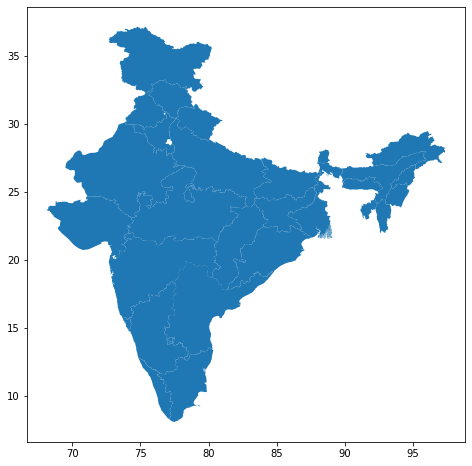

,ST_NAME,geometry,Unnamed: 0,Achievement as on 2021-01-26,Daily Requirements,Target Length,Completed Length,percentage
0,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",1,0.00,22.94,1797.0,328.916,18.303617
1,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",2,19.27,63.54,4850.0,802.410,16.544536
2,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",3,2.49,15.83,2130.0,1119.621,52.564366
3,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",4,0.00,48.29,4490.0,1399.453,31.168218
4,Chhattisgarh,"POLYGON ((83.79799 22.28996, 83.79752 22.28949...",5,3.51,35.48,4000.0,1732.578,43.314450


In [95]:
ta5.plot()
plt.show()
ta5.head()

### Data visualization through map

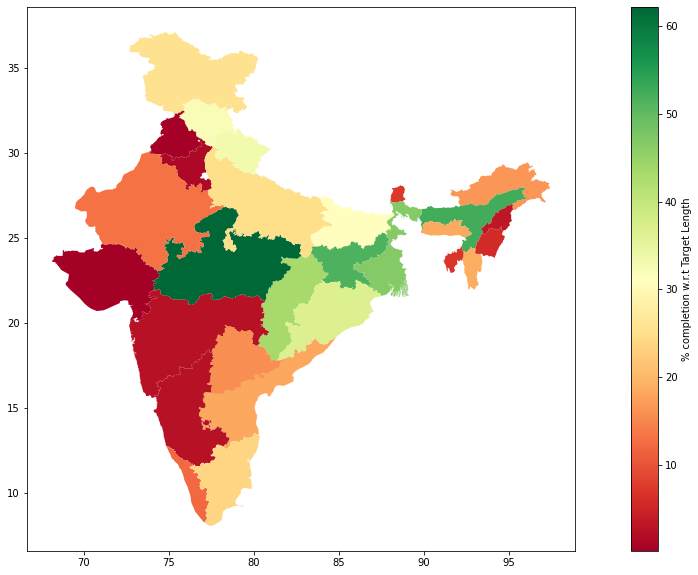

In [97]:
ax1=ta5.plot(column="percentage",
               cmap="RdYlGn",
                legend="True",
                 legend_kwds={'label':"% completion w.r.t Target Length", 'orientation':'vertical'},
               figsize=(20,10))

### Data vizualization through bar graph

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


,State,Achievement as on 2021-01-26,Daily Requirements,Target Length,Completed Length,%Completed,Final
21,Punjab,0.0,7.80,500.0,1.09,0.218000,100
7,Gujarat,0.0,10.91,700.0,2.01,0.287143,100
8,Haryana,0.0,7.71,500.0,6.50,1.300000,100
19,Nagaland,0.0,6.81,450.0,14.20,3.155556,100
15,Maharashtra,0.0,12.94,850.0,21.98,2.585882,100


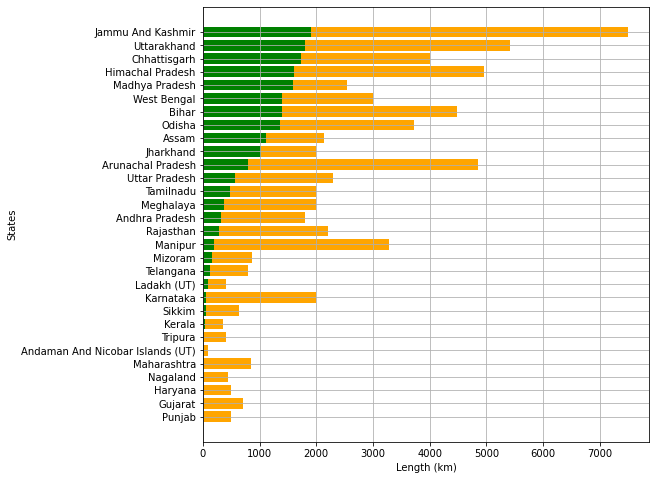

In [98]:
import numpy as np
ta2.head()
ta5=ta2.loc[(ta2["Daily Requirements"]<100)&(ta2["Target Length"]>0)]
ta5["%Completed"]=(ta5["Completed Length"]/ta5["Target Length"])*100

ta6=ta5.sort_values(by=["Completed Length"],ascending=True)
default_value=100
ta6["Final"]=default_value

ta6.head()

ach1=ta6["Completed Length"]
req1=ta6["Target Length"]
states=ta6["State"]

plt.barh(states,req1,color=["orange"])
plt.barh(states,ach1,color=["green"])
ax=plt.axes()
plt.grid()
#ax.invert_yaxis()
plt.xlabel("Length (km)")
plt.ylabel("States")

#plt.legend()
plt.rcParams["figure.figsize"]=(8,8)
ta6.head()